You are given a data set of free form text data which are actually a collection of movie plot summaries. You need to make a categorization based on those movie plots. Please produce the following outcome of your work:

* Using any clustering algorithm of your choice, you need to let us know how many categorization you are suggesting.
* Also apply LDA algorithm on this and produce a visualization of your clusters using pyLDAVis. You can create an html file and share.
Input Dat Set:

You will be using the CMU Movie Summary Corpus.  You only need to use the data file named plot_summaries.txt for this assignment

#### Mounting to Google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import os
os.chdir("/gdrive/My Drive/movies/")
os.listdir()

['movie.metadata.tsv',
 'plot_summaries.txt',
 'Assignment6_Ashish_Gupta_3666_02_ANLP.html']

In [3]:
import pandas as pd
import csv
import chardet
import json
from sklearn.preprocessing import FunctionTransformer

In [4]:
file_object  = open('plot_summaries.txt', 'r')
print (file_object.read(500))
rawdata = file_object.read()
#chardet.detect(rawdata.encode())

23890098	Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.
31186339	The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole surviv


In [5]:
plot = pd.read_csv("plot_summaries.txt", sep='\t', encoding='utf-8',
                   names=["ident", "synopsis"], index_col=0)

In [6]:
plot.loc[6040782]

synopsis    1940 - Operation Dynamo has just taken place. ...
Name: 6040782, dtype: object

2. Feature analysis and wrangling - First, a review of the text shows that some of the data contains tags such as "{{plot}}" and "{{No plot}}" For Example

In [7]:
#Example 1
plot.loc[23851782]

synopsis    {{plot}} The film opens with a Great Western e...
Name: 23851782, dtype: object

In [8]:
#Example 2
plot.loc[34980460]

synopsis    {{No plot}} This film follows 12 years in the ...
Name: 34980460, dtype: object

In [9]:
plot.synopsis

ident
23890098    Shlykov, a hard-working taxi driver and Lyosha...
31186339    The nation of Panem consists of a wealthy Capi...
20663735    Poovalli Induchoodan  is sentenced for six yea...
2231378     The Lemon Drop Kid , a New York City swindler,...
595909      Seventh-day Adventist Church pastor Michael Ch...
                                  ...                        
34808485    The story is about Reema , a young Muslim scho...
1096473     In 1928 Hollywood, director Leo Andreyev  look...
35102018    American Luthier focuses on Randy Parsons’ tra...
8628195     Abdur Rehman Khan , a middle-aged dry fruit se...
6040782     1940 - Operation Dynamo has just taken place. ...
Name: synopsis, Length: 42303, dtype: object

In [10]:
def deleteSynopsisTags_1(X):
  return X.str.replace("\s*{{\w*}}\s*", "", case=False)

def deleteSynopsisTags_2(X):
  return X.str.replace("\s*{{\w* \w*}}\s*", "", case=False)

deleteSynopsisTagsTransformer_1 = FunctionTransformer(deleteSynopsisTags_1, validate=False)
deleteSynopsisTagsTransformer_2 = FunctionTransformer(deleteSynopsisTags_2, validate=False)

X_wrangle_1 = deleteSynopsisTagsTransformer_1.fit_transform(plot.synopsis)
X_wrangle_2 = deleteSynopsisTagsTransformer_2.fit_transform(X_wrangle_1)

In [11]:
X_wrangle_2.loc[23851782]

'{{plot}} The film opens with a Great Western express speeding out of Box Tunnel on route to Cornwall. The train\'s passengers include Herbert and Edna, a young couple travelling to Truro to be married, Miss Bourne, a West London spinster visiting evacuated relatives, Tommy Gander, an overenthusiastic Vaudeville-style comedian and entertainer headed for the Pier Pavilion at Newquay to put on a show, Dr Sterling, a locum for a doctor in Redruth, Richard G Winthrop and his cousin Jackie, also heading for Truro, and Teddy Deakin. Just as they are passing Teignmouth, the communication cord is pulled and the train stops - only for the guard and passengers to find that Gander has lost his hat and is running back to retrieve it. Ignorant of the delay this has caused, he returns to the train and comes across Jackie Winthrop in her compartment. Gander tries to make conversation with her, but Teddy has his eye on Jackie and is quick to try and send him packing - at one point he insinuates that G

In [12]:
#Example 2
X_wrangle_2.loc[34980460]

'{{No plot}} This film follows 12 years in the lives of 3 Irish traveller familys  and their bitter feuds and fights. The film explores the reasons why they hold these fights and explores the in-depth secret lives of the familys, which is barely known to outsiders of the travelling community. A gripping tale of passion and respect and blood bonds that will never end.'

In [13]:
Preformatted_Text = pd.DataFrame(X_wrangle_2)
Preformatted_Text = Preformatted_Text.reset_index()

In [14]:
Preformatted_Text['synopsis'][0]

"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."

In [15]:
#Creating a sample to avoid Google Colab Crash
import random
Preformatted_Text_sample = Preformatted_Text.sample(n=2500, random_state=42)

In [16]:

Preformatted_Text_sample.shape

(2500, 2)

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet as wn

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
class TextNormalizer(BaseEstimator, TransformerMixin):

    def __init__(self, language='english'):
        self.stopwords = set(nltk.corpus.stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()
        self.word_tokenizer=WordPunctTokenizer()
        self.sent_tokenizer=nltk.data.LazyLoader('tokenizers/punkt/english.pickle')

    def is_punct(self, token):
        return all(
        unicodedata.category(char).startswith('P') for char in token)

    def is_stopword(self, token):
        return token.lower() in self.stopwords

    def normalize(self, document):
        return (
        self.lemmatize(token).lower()
        for sentence in self.sent_tokenizer.tokenize(document)
        for token in self.word_tokenizer.tokenize(sentence)
        if not self.is_punct(token) and not self.is_stopword(token))

    def lemmatize(self, token):
        return self.lemmatizer.lemmatize(token)

    def fit(self, X, y=None):
        return self

    def transform(self, documents):
        return [' '.join(self.normalize(doc)) for doc in documents]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
class OneHotVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(binary=True)

    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        freqs = self.vectorizer.fit_transform(documents)
        return [freq.toarray()[0] for freq in freqs]

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import AgglomerativeClustering
from nltk.cluster import KMeansClusterer

class KMeansClusters(BaseEstimator, TransformerMixin):
    def __init__(self, k=7):
        """
        k is the number of clusters model is the implementation of Kmeans
        """
        self.k = k
        self.distance = nltk.cluster.util.cosine_distance
        self.model = KMeansClusterer(self.k, self.distance, avoid_empty_clusters=True)

    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        """
        Fits the K-Means model to one-hot vectorized documents.
        """
        return self.model.cluster(documents, assign_clusters=True)

### Step-2: Read the procesed Movie dataset and apply further processing and Machine Learning models

### Building Text Normalization class

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
#Clustering the first 5000 observations. The Google Colab crashes while taking whole data
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

docs = Preformatted_Text_sample['synopsis']

model = Pipeline([
        ('norm', TextNormalizer()),
        ('vect', OneHotVectorizer())
        ])

Vector = model.fit_transform(docs)

In [29]:
import numpy as np
vector_array = np.array(Vector)
vector_array.shape

(2500, 31395)

In [30]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(np.array(Vector))
    Sum_of_squared_distances.append(km.inertia_)

In [31]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(vector_array)
    kmeanModel.fit(vector_array)
    distortions.append(sum(np.min(cdist(vector_array, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / vector_array.shape[0])

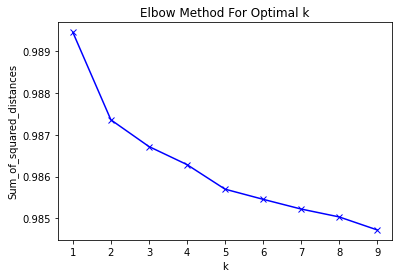

In [32]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Using the Elbow Diagram, I can choose either 5 or 6 Clusters. I will choose 6 Clusters

In [33]:
model = Pipeline([
        ('clusters', KMeansClusters(k=6))
        ])

clusters = model.fit_transform(np.array(Vector))

In [34]:
files = list(Preformatted_Text_sample['ident'])

for idx, cluster in enumerate(clusters):
    print("Movie '{}' was assigned to cluster #{}.".format(files[idx],cluster))

Movie '22333286' was assigned to cluster #0.
Movie '19074986' was assigned to cluster #5.
Movie '31193551' was assigned to cluster #1.
Movie '28631198' was assigned to cluster #3.
Movie '27386187' was assigned to cluster #5.
Movie '17489405' was assigned to cluster #2.
Movie '30199617' was assigned to cluster #0.
Movie '8904818' was assigned to cluster #2.
Movie '13998597' was assigned to cluster #3.
Movie '3947' was assigned to cluster #3.
Movie '1929835' was assigned to cluster #3.
Movie '23007275' was assigned to cluster #5.
Movie '10792098' was assigned to cluster #2.
Movie '2748232' was assigned to cluster #5.
Movie '24903317' was assigned to cluster #2.
Movie '1204611' was assigned to cluster #3.
Movie '20113608' was assigned to cluster #3.
Movie '3310853' was assigned to cluster #2.
Movie '3201938' was assigned to cluster #0.
Movie '5991505' was assigned to cluster #3.
Movie '5832380' was assigned to cluster #5.
Movie '11375668' was assigned to cluster #2.
Movie '25310492' was a

Apply LDA algorithm on this and produce a visualization of your clusters using pyLDAVis.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

N_TOPICS = 10
N_TERM_PER_TOPIC = 15

normalizer = TextNormalizer()
docs_normalized = normalizer.fit_transform(docs)

vectorizer = TfidfVectorizer(preprocessor=None, lowercase=False)
docs_vectorized = vectorizer.fit_transform(docs_normalized)

lda =  LatentDirichletAllocation(n_components=N_TOPICS)
lda.fit_transform(docs_vectorized)

names = vectorizer.get_feature_names_out()
topics = dict()

for idx, topic in enumerate(lda.components_):
    features = topic.argsort()[:-(N_TERM_PER_TOPIC + 1): -1]
    tokens = [names[i] for i in features]
    topics[idx] = tokens

for topic, terms in topics.items():
    print("Topic #{}:".format(topic+1))
    print(terms)

Topic #1:
['dracula', 'oswald', 'andrew', 'amar', 'holmes', 'carla', 'roy', 'daffy', 'penguin', 'mickey', 'ginger', 'documentary', 'alexandra', 'lori', 'charlie']
Topic #2:
['jimmy', 'ellen', 'holmes', 'gowri', 'dave', 'allan', 'shane', 'kitty', 'siva', 'roy', 'pooja', 'luk', 'patch', 'barber', 'phoebe']
Topic #3:
['alice', 'bugs', 'matt', 'charlie', 'amy', 'paul', 'julian', 'billy', 'johnny', 'zombie', 'kevin', 'elizabeth', 'bud', 'woody', 'dorothy']
Topic #4:
['miles', 'sunil', 'kathy', 'goldilocks', 'mitchell', 'lucy', 'jackie', 'bart', 'melissa', 'ray', 'rohan', 'merivel', 'sasha', 'hale', 'creeper']
Topic #5:
['danny', 'willy', 'mitchell', 'sonny', 'jeannie', 'johnny', 'gypsy', 'paul', 'crawford', 'nicky', 'maureen', 'tournament', 'boogie', 'tony', 'sally']
Topic #6:
['jonathan', 'shiva', 'tyson', 'eli', 'johnny', 'samson', 'oscar', 'irma', 'ruth', 'elizabeth', 'fred', 'tori', 'morgan', 'lung', 'jamie']
Topic #7:
['tony', 'bugs', 'slum', 'vicky', 'shankar', 'andy', 'hank', 'docume

In [36]:
pip install pyLDAvis

In [37]:
import pyLDAvis
import pyLDAvis.lda_model

data = pyLDAvis.lda_model.prepare(lda, docs_vectorized, vectorizer)

pyLDAvis.save_html(data, 'Assignment6_Ashish_Gupta_3666_02_ANLP.html')

In [38]:
pyLDAvis.enable_notebook()
pyLDAvis.display(data)